<!-- 伪代码： -->
1.A，B,C,D...车辆已经按离各自的距离排列，即B离A最近，C离A第二近....(为的是减少传感器测量距离增加而带来的误差)
  从传感器获得车辆AB间的距离为dB  
  从传感器获得车辆BC间的距离为dC
  ...
2. 定义车辆位置信息： car_positions = {'A': [x, y], 'B': [x, y], ...}
3. 定义车辆实际位置信息： car_positionsreal = {'A':[x, y], 'B': [x, y], ...}
4. 
  for K in car_positions:
    car_positions[K] = np.array(car_positions[K])
    car_positionsreal[K] = np.array(car_positionsreal[K])
5. 定义计算欧几里得距离的函数： 
  def distance(A, B):
    return np.linalg.norm(np.array(A) - np.array(B))
6. 定义计算夹角的函数： 
  def angle(A, B):
    x = B[0] - A[0]
    y = B[1] - A[1]
    angle_rad = np.arctan2(y, x)
    angle_deg = np.rad2deg(angle_rad)
    return (90 - angle_deg) % 360
7. 定义车辆距离函数： 即为该车辆与前一个（已更新位置）的车辆间的距离
  def length(K):
    if K in car_positionsreal:
      m = distance(car_positionsreal[chr(ord(K)-1)], car_positionsreal[K])
    else:
      print('K' not found in car_positionsreal dictionary")
    return m
8. 定义预测位置函数： 
  def predict_position(pos, angle, dist):
    x = pos[0] + np.sin(math.radians(angle)) * dist
    y = pos[1] + np.cos(math.radians(angle)) * dist
    return x, y
9. 更新车辆位置信息： 
记初始预测坐标A,B间的欧式距离为m1
记err1=abs(m1-dB)
  for car in car_positions:
    if car not in ['B','A']:
      遍历其它车辆（除了A、B车辆），对于每辆车通过计算与A车辆的距离和角度信息，预测A车辆的位置。
      dist = distance(car_positionsreal['A'], car_positionsreal[car])
      angle = angle(car_positionsreal[car],car_positionsreal['A'])
      # 计算预测的位置,用车辆观察A
      x, y = predict_position(car_positions[car], angle, dist)
      PRE_A = [x, y]
      # 计算预测位置与B车辆之间的欧氏距离
      m = distance(PRE_A, car_positions['B'])
      err为预测的AB距离与实际传感器测量的欧氏距离之差的绝对值
      err=abs(m-dB)
      # 如果比之前的最小距离小，则更新最小距离和对应的A点位置
      if err < err1:
        err1 = err
        min_a_pos = PRE_A
  car_positions['A'] = min_a_pos # 最终确定K车辆的位置为更新后的最小误差对应的A点位置。

10. 通过观察车辆预测其它车辆的位置： 
对于K在车辆位置中的每一个元素：
   如果K不是'A'
       对于car在车辆位置中的每一个元素：
           如果car不在['K']中
               计算m1为从car_positions[K]到car_positionsreal[chr(ord(K)-1)]的距离，即K车到离他最近的前一辆车的距离
               计算dK为车K和K-1之间的真实距离（传感器获得）
               计算err为m1和dK之间的差值的绝对值
               计算dist为从car_positionsreal[K]到car_positionsreal[car]的距离
               计算angle1为从car_positionsreal[car]到car_positionsreal[K]的角度
               计算PRE_K为基于car和dist，angle1预测的K点位置
               计算m3为从PRE_K到car_positionsreal[chr(ord(K)-1)]的距离（预测的K点坐标到已经更新过位置的（K-1）车的距离
               计算err1为m3和dK之间的差值的绝对值
               如果err1 < err，则更新min_a_pos为PRE_K，更新car_positions[K]为min_a_pos
       输出改进后的car_positions[K]
11. 输出车辆位置信息： 
  for K in car_positions:
    print(K, car_positions[K])

In [1]:
import numpy as np
import math

In [2]:
# 假设已知的车辆位置信息
car_positions = {'A': [679857.06, 419314.97],
                 'B': [679857.94, 419332.56],
                 'C': [679859.44, 419305.3],
                 'D': [679859.56, 419339.47],
                 'E': [679860.75, 419356.9],}
                #  # ...
                #  'N': [x_n, y_n]}

In [52]:
print(car_positionsreal['A'])

[679857.2739, 419317.2236]


In [20]:
# 选择任意一辆车作为A
print(car_positions['A'])

[679857.06, 419314.97]


In [ ]:
# 根据距离A车辆的远近对车辆进行排序
# sorted_cars = sorted(car_positions.items(), key=lambda x: distance(x[1], car_positions[a_car]))

# 按顺序为车辆分配新的标识符
# car_ids = {a_car: 'A'}
# for i, (car, pos) in enumerate(sorted_cars):
    # car_ids[car] = chr(ord('A') + i + 1)

# # 打印车辆标识符和位置信息
# for car, pos in car_positions.items():
#     print(f'Car {car_ids[car]}: {pos}')

# 假设已知的车辆位置信息，并已经按离A车距离进行处理
# car_positions = {'A': [x_a, y_a],
#                  'B': [x_b, y_b],
#                  'C': [x_c, y_c],
#                  'D': [x_d, y_d],
#                  'E': [x_e, y_e],
#                  # ...
#                  'N': [x_n, y_n]}
# done

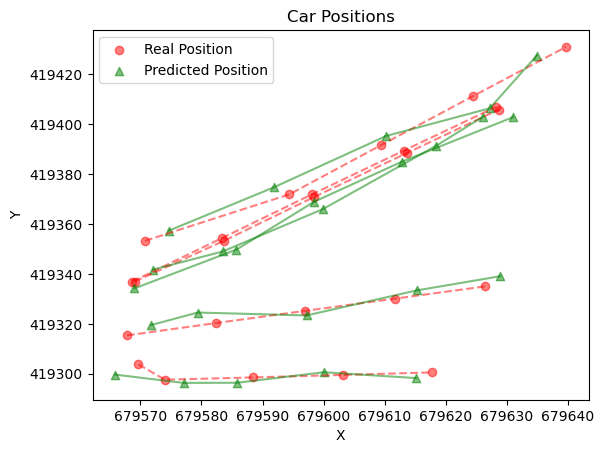

In [75]:
# # 1
# car_positions_predicted = {'A': [[679858.19, 419315.5], [679858.74, 419316.12], [679859.28, 419316.74], [679859.83, 419317.35], [679860.38, 419317.97]],
#                            'B': [[679859.07, 419333.08], [679859.74, 419333.61], [679860.41, 419334.14], [679861.07, 419334.67], [679861.74, 419335.2]],
#                            'C': [[679860.07, 419305.95], [679860.37, 419306.25], [679860.68, 419306.55], [679860.99, 419306.85], [679861.3, 419307.15]],
#                            'D': [[679859.45, 419339.64], [679859.72, 419340.09], [679859.99, 419340.55], [679860.26, 419341.01], [679860.53, 419341.46]],
#                            'E': [[679861, 419357.33], [679861.21, 419357.54], [679861.42, 419357.76], [679861.63, 419357.97], [679861.84, 419358.19]]}
# car_positions_real = {'A': [[679857.8, 419317.36], [679858.36, 419317.81], [679858.92, 419318.26], [679859.48, 419318.7], [679860.04, 419319.15]],
#                       'B': [[679858.67, 419334.94], [679859.34, 419335.47], [679860, 419336], [679860.67, 419336.53], [679861.34, 419337.06]],
#                       'C': [[679859.67, 419307.73], [679859.97, 419308.03], [679860.28, 419308.33], [679860.59, 419308.63], [679860.89, 419308.93]],
#                       'D': [[679859.05, 419341.9], [679859.32, 419342.35], [679859.59, 419342.8], [679859.86, 419343.25], [679860.13, 419343.7]],
#                       'E': [[679860.75, 419359.26], [679860.96, 419359.47], [679861.17, 419359.69], [679861.38, 419359.9], [679861.59, 419360.12]]}

# 2
# car_positions_real = {'A': [[678243.7, 419221.46],[678244.5, 419224.87],[678245.3, 419229.59],[678246.2, 419234.31],[678247.0, 419239.03]],
#                       'B':[[678245.6, 419218.64],[678245.4, 419219.79],[678246.2, 419216.49],[678247.0, 419213.19],[678247.8, 419209.89]],
#                       'C': [[678247.41, 419214.73],[678248.1, 419208.58],[678250.3, 419204.16],[678252.5, 419199.74],[678254.7, 419195.32]],
#                       'D': [[678252.32, 419210.86],[678259.8, 419203.72],[678261.2, 419200.17],[678262.6, 419196.63],[678264.0, 419193.08]],
#                       'E': [[678259.06, 419209.98], [678267.1, 419201.56],[678269.1, 419201.91],[678271.1, 419202.26],[678273.1, 419202.61]]}
# car_positions_predicted= {'A': [[678243.8353295411, 419221.0477499828], [678245.1112313139, 419225.1126462993],[678245.2891538935, 419228.49499240017],[678246.3811834924, 419234.9997387968],[678248.0999149746, 419239.2883332498]],
#  'B': [[678246.6856452288, 419218.8227416542], [678245.9925491047, 419219.1034545535], [678246.6235046282, 419215.88598868356], [678247.2229779261, 419212.9567363966], [678247.8742738651, 419210.5650171349]],
#  'C': [[678247.0800618422, 419214.2747239639], [678247.397317909, 419214.4909276726],[678250.6991871091, 419203.0761417088],[678251.7901399615, 419198.49768710445],[678253.5466979794, 419195.07676977076]],
#  'D': [[678251.839170848, 419211.21784232673], [678249.0336565373, 419208.456220591],[678261.1155526517, 419199.91531280486],[678263.5740526696, 419197.6427405279], [678264.8147462324, 419193.2324872386]],
#  'E': [[678258.6807528071, 419210.07440494903], [678266.9376269461, 419200.5315082831],[678269.4471185466, 419202.3232328361],[678270.671955444, 419201.8259155104], [678272.7681083353, 419200.5464053012]]}

# 3
# # 
car_positions_real = {'A': [[679567.8, 419315.36], [679582.4, 419320.3],[679597.0, 419325.2],[679611.7, 419330.1],[679626.5, 419335.0]],
                      'B': [[679568.67, 419336.94],[679583.3, 419354.3], [679598.1, 419371.9],[679613.1, 419389.4],[679628.2, 419406.9]],
                      'C': [[679569.67, 419303.73], [679574.0, 419297.6],[679588.5, 419298.5],[679603.1, 419299.5],[679617.7, 419300.5]],
                      'D': [[679569.05, 419336.9],[679583.7, 419353.3],[679598.5, 419370.9],[679613.6, 419388.4],[679628.7, 419405.9]],
                      'E': [[679570.75, 419353.26],[679594.4, 419371.9],[679609.4, 419391.6],[679624.5, 419411.3],[679639.7, 419431.0]]
                      }
# car_positions_predicted={'A': [[679567.7600464319, 419315.6356691089], [679581.4354623735, 419322.56448853784], [679594.5398964143, 419325.7020735244], [679614.511922385, 419331.16702105047], [679628.0419297203, 419335.947388193]], 
#                          'B': [[679567.5651192829, 419339.2360114649], [679585.5010912229, 419355.3433366497], [679595.354714549, 419374.6732978494], [679610.8252187488, 419392.3784077928], [679626.7310912788, 419405.4930818834]], 
#                          'C': [[679567.3386183648, 419301.9466144039], [679572.8091594176, 419298.3039350927], [679590.6016089747, 419297.71317760576], [679603.0121092775, 419299.8581868997], [679616.0202006826, 419300.56650938146]], 
#                          'D': [[679569.5858758937, 419338.83180655073], [679584.1254673173, 419351.0379559338], [679596.986465911, 419369.70059870137], [679613.7750349569, 419391.3017430539], [679627.6361272596, 419408.5380078984]],
#                            'E': [[679571.6033799397, 419352.22068169044], [679596.7525041585, 419371.49794029613], [679610.1332026712, 419394.28909781494], [679627.0402947699, 419412.9519224822], [679640.7622526498, 419431.77020469087]]}
car_positions_predicted={'A': [[679571.7910665036, 419319.5239597987], [679579.3756614258, 419324.5109468876], [679597.2105232948, 419323.3432458744], [679615.2276918738, 419333.36769636616], [679628.9454383308, 419339.07154290803]], 'B': [[679569.0250607723, 419334.19116967265], [679585.7301726558, 419349.75766102405], [679598.4733232218, 419368.95920744626], [679612.805667916, 419384.9644475389], [679631.0665876325, 419402.87360331527]], 'C': [[679565.8521482188, 419299.6298055182], [679577.0867466793, 419296.29419468535], [679585.8797699616, 419296.3706681562], [679600.012596753, 419300.56755600683], [679615.1380148211, 419298.2363092684]], 'D': [[679572.0773066409, 419341.7356970175], [679583.492397418, 419349.0013419019], [679599.8730746356, 419365.9689743493], [679618.3816835986, 419391.27560341766], [679626.1607429235, 419403.1054589136]], 'E': [[679574.6271237563, 419357.3127021758], [679591.9005933938, 419374.7595830077], [679610.2523570973, 419395.3040807848], [679627.2078803176, 419406.3877280051], [679634.9058423485, 419427.50483539177]]}
# 4
# car_positions_real = {
#     'A': [[679223.8, 419925.24],[679223.98, 419925.92], [679225.13, 419927.14], [679227.27, 419928.35], [679228.40, 419929.55]],
#     'B': [[679217.87, 419924.04], [679218.25, 419924.58],[679218.49, 419927.02], [679218.72, 419929.46], [679219.95, 419931.89]],
#     'C': [[679209.92, 419928.3], [679210.51, 419928.67],  [679215.30, 419930.62], [679220.09, 419932.57], [679224.88, 419934.53]],
#     'D': [[679231.7, 419924.7], [679234.33, 419925.10], [679234.63, 419926.67], [679235.92, 419928.23], [679236.21, 419930.78]],
#     'E': [[679225, 419930.16], [679225.39, 419930.99],[679224.55, 419931.96], [679223.72, 419932.93], [679222.89, 419933.90]]
# }

# car_positions_predicted={'A': [[679222.9911497654, 419925.11842419003], [679223.0927543408, 419925.32483867276], [679224.7596408302, 419927.70584979886], [679227.0030219485, 419929.33125111094], [679228.7742857231, 419928.80923082377]], 
#  'B': [[679217.8361029198, 419924.42765086185], [679217.4654754398, 419925.40787741746], [679218.2559568951, 419926.3731166684], [679218.7040638359, 419930.28710495966], [679220.2622532153, 419932.82279863744]], 
#  'C': [[679209.5656050195, 419928.2745547134], [679209.9449783501, 419927.92934269976], [679215.666254422, 419930.70225156145], [679219.1127776077, 419931.6936333448], [679224.2161824843, 419934.38198013813]], 
#  'D': [[679231.0283015256, 419923.8173520172], [679234.6083334652, 419925.74546861753], [679234.5539974711, 419925.7883572277], [679236.2433015015, 419927.94082955795], [679236.3484468762, 419930.9892103845]], 
#  'E': [[679224.61128661, 419929.84621762857], [679225.5124990226, 419930.98466729483], [679224.0751901573, 419932.7914789125], [679223.2818236798, 419933.49054410175], [679222.3521728375, 419933.52801221324]]}

# 5
# car_positions_real = {
#     'A': [[679103.8, 419874.44],[679101.9, 419874.1],[679100.0, 419873.8],[679098.1, 419873.5],[679096.2, 419873.2]],
#     'B': [[679115.87, 419867.04], [679114.6, 419867.4],[679113.2, 419867.1],[679111.7, 419866.8],[679110.3, 419866.5]],
#     'C': [[679107.92, 419878.23],[679109.9, 419878.0],[679109.0, 419878.3],[679108.1, 419878.6],[679107.2, 419878.9]], 
#     'D': [[679119.7, 419884.17], [679118.0, 419884.4],[679117.2, 419884.8],[679116.5, 419885.3],[679115.7, 419885.7]],
#     'E': [[679112.32, 419874.36],[679110.1, 419874.2],[679108.9, 419874.1],[679107.6, 419874.0],[679106.4, 419873.9]]
# }
# car_positions_predicted={'A': [[679104.604302788, 419873.876108093], [679102.1197650557, 419873.94681661075], [679099.2509795589, 419874.6533157305], [679098.4289491571, 419873.1141934248], [679096.014921483, 419874.021904007]], 
#  'B': [[679115.1458952286, 419867.8679965003], [679114.007855628, 419866.868082725], [679112.7112984199, 419867.7526301632], [679111.5816670174, 419867.61415318627], [679111.0298272558, 419866.4695464277]], 
#  'C': [[679107.7356440095, 419877.7775676391], [679109.6738460424, 419877.8522229713], [679109.6012021422, 419877.3050068937], [679107.3813498842, 419877.91410405934], [679107.8991789189, 419878.235802899]], 
#  'D': [[679119.2715572877, 419884.05475832307], [679118.6562661085, 419885.2115079461], [679117.2505968094, 419885.2316800251], [679117.0070307378, 419884.489885781], [679116.6266728034, 419884.8110013004]], 
#  'E': [[679112.0179297857, 419873.5512840959], [679110.1949232763, 419874.89718570356], [679109.386286228, 419873.940422423], [679108.1986185089, 419874.8422292156], [679106.1924565478, 419873.2587834617]]}


import matplotlib.pyplot as plt



# Extract x and y coordinates for real positions
x_real, y_real = [], []
for car_id in car_positions_real:
    x_real += [pos[0] for pos in car_positions_real[car_id]]
    y_real += [pos[1] for pos in car_positions_real[car_id]]

# Extract x and y coordinates for predicted positions
x_predicted, y_predicted = [], []
for car_id in car_positions_predicted:
    x_predicted += [pos[0] for pos in car_positions_predicted[car_id]]
    y_predicted += [pos[1] for pos in car_positions_predicted[car_id]]

# Create a scatter plot with real positions
fig, ax = plt.subplots()
ax.scatter(x_real, y_real, color='r', alpha=0.5, label='Real Position', marker='o')

# Add predicted positions to the scatter plot
ax.scatter(x_predicted, y_predicted, color='g', alpha=0.5, label='Predicted Position', marker='^')

# Connect the positions of each car with different line styles
for car_id in car_positions_real:
    ax.plot(x_real[5 * (ord(car_id) - 65) : 5 * (ord(car_id) - 65) + 5], y_real[5 * (ord(car_id) - 65) : 5 * (ord(car_id) - 65) + 5], color='r', alpha=0.5, linestyle='--')
    ax.plot(x_predicted[5 * (ord(car_id) - 65) : 5 * (ord(car_id) - 65) + 5], y_predicted[5 * (ord(car_id) - 65) : 5 * (ord(car_id) - 65) + 5], color='g', alpha=0.5, linestyle='-')

# Set the graph title, labels, and legend
ax.set_title('Car Positions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

# Display the graph
plt.show()

In [74]:

import copy
import random
car_positions_real = {'A': [[679567.8, 419315.36], [679582.4, 419320.3],[679597.0, 419325.2],[679611.7, 419330.1],[679626.5, 419335.0]],
                      'B': [[679568.67, 419336.94],[679583.3, 419354.3], [679598.1, 419371.9],[679613.1, 419389.4],[679628.2, 419406.9]],
                      'C': [[679569.67, 419303.73], [679574.0, 419297.6],[679588.5, 419298.5],[679603.1, 419299.5],[679617.7, 419300.5]],
                      'D': [[679569.05, 419336.9],[679583.7, 419353.3],[679598.5, 419370.9],[679613.6, 419388.4],[679628.7, 419405.9]],
                      'E': [[679570.75, 419353.26],[679594.4, 419371.9],[679609.4, 419391.6],[679624.5, 419411.3],[679639.7, 419431.0]]
                      }
# 生成预测坐标的误差范围
error_range = (-5, 5)

# 复制真实坐标
car_positions_pred = copy.deepcopy(car_positions_real)

# 随机生成误差，添加到真实坐标上，生成预测坐标
for car, positions in car_positions_pred.items():
    for i in range(len(positions)):
        error_x = random.uniform(*error_range)
        error_y = random.uniform(*error_range)
        positions[i][0] += error_x
        positions[i][1] += error_y
print(car_positions_pred)

{'A': [[679571.7910665036, 419319.5239597987], [679579.3756614258, 419324.5109468876], [679597.2105232948, 419323.3432458744], [679615.2276918738, 419333.36769636616], [679628.9454383308, 419339.07154290803]], 'B': [[679569.0250607723, 419334.19116967265], [679585.7301726558, 419349.75766102405], [679598.4733232218, 419368.95920744626], [679612.805667916, 419384.9644475389], [679631.0665876325, 419402.87360331527]], 'C': [[679565.8521482188, 419299.6298055182], [679577.0867466793, 419296.29419468535], [679585.8797699616, 419296.3706681562], [679600.012596753, 419300.56755600683], [679615.1380148211, 419298.2363092684]], 'D': [[679572.0773066409, 419341.7356970175], [679583.492397418, 419349.0013419019], [679599.8730746356, 419365.9689743493], [679618.3816835986, 419391.27560341766], [679626.1607429235, 419403.1054589136]], 'E': [[679574.6271237563, 419357.3127021758], [679591.9005933938, 419374.7595830077], [679610.2523570973, 419395.3040807848], [679627.2078803176, 419406.3877280051],

In [ ]:

未来1个时隙：

A: [679223.98, 419925.92]
B: [679218.25, 419924.58]
C: [679210.51, 419928.67]
D: [679230.33, 419925.10]
E: [679225.39, 419930.99]

未来2个时隙：

A: [679218.13, 419927.14]
B: [679218.49, 419927.02]
C: [679215.30, 419930.62]
D: [679224.63, 419926.67]
E: [679224.55, 419931.96]

未来3个时隙：

A: [679212.27, 419928.35]
B: [679218.72, 419929.46]
C: [679220.09, 419932.57]
D: [679219.92, 419928.23]
E: [679223.72, 419932.93]

未来4个时隙：

A: [679206.40, 419929.55]
B: [679219.95, 419931.89]
C: [679224.88, 419934.53]
D: [679215.21, 419930.78]
E: [679222.89, 419933.90]


car_positions = {}
time_step = 0.5 # 单位：小时

for car, info in car_positions_real.items():
    s1, s2 = info[0], info[1]
    v0 = ((s2[0]-s1[0])**2 + (s2[1]-s1[1])**2)**0.5 / (time_step * 3600) # 计算初始速度
    a = 1.2 # 加速度固定为 1.2 m/s^2，对应速度的单位为 km/h/s
    s0 = [s1[0] - v0 * time_step * 3600, s1[1] - v0 * time_step * 3600] # 计算初始位置
    positions = [s1, s2]
    for i in range(2, 6):
        v = v0 + a * (i-1) * time_step # 计算当前时刻的速度
        s = [s0[0] + v0 * (i-1) * time_step + 0.5 * a * (i-1) * time_step**2,
             s0[1] + v0 * (i-1) * time_step + 0.5 * a * (i-1) * time_step**2] # 计算当前时刻的位置
        positions.append(s)
    car_positions[car] = positions

In [16]:
import matplotlib.pyplot as plt

# 实际坐标：
car_positions_real = {'A':[[679857.2739, 419317.2236], [679858.25, 419318.35], ...], # 未来5秒每1秒的真实车辆位置信息，格式为[[x0,y0],[x1,y1],...]
                 'B': [[679858.8576, 419333.4677], [679859.11, 419335.93], ...],
                 'C': [[679859.7071, 419307.1674], [679860.64, 419308.72], ...], 
                 'D': [[679859.6912, 419340.4366], [679859.99, 419341.88], ...], 
                 'E': [[679860.8342, 419357.7712], [679861.12, 419359.26], ...],}

# 假设已知的车辆位置信息 优化前
car_positions = {'A': [679857.06, 419314.97],
                 'B': [679857.94, 419332.56],
                 'C': [679859.44, 419305.3], 
                 'D': [679859.56, 419339.47], 
                 'E': [679860.75, 419356.9],}

# 接下来5秒每1秒的预测车辆位置信息
car_positions_predicted = {'A': [[679858.19, 419315.5], [679858.74, 419316.12], ...], 
                           'B': [[679859.07, 419333.08], [679859.74, 419333.61], ...],
                           'C': [[679860.07, 419305.95], [679860.37, 419306.25], ...],
                           'D': [[679859.45, 419339.64], [679859.72, 419340.09], ...], 
                           'E': [[679861, 419357.33], [679861.21, 419357.54], ...]}

# 将所有坐标点的x,y分别存储到两个列表中
x_real, y_real = [], []
x_predicted, y_predicted = [], []
x_initial, y_initial = [], []
for car_id in car_positions_real:
    x_real.append([pos[0] for pos in car_positions_real[car_id]])
    y_real.append([pos[1] for pos in car_positions_real[car_id]])
    x_predicted.append([pos[0] for pos in car_positions_predicted[car_id]])
    y_predicted.append([pos[1] for pos in car_positions_predicted[car_id]])
    x_initial.append(car_positions[car_id][0])
    y_initial.append(car_positions[car_id][1])

# 画出初始位置
fig, ax = plt.subplots()
ax.scatter(x_initial, y_initial, color='b', label='Initial Position')

# 画出真实位置和预测位置
for i, car_id in enumerate(car_positions_real):
    ax.plot(x_real[i], y_real[i], color='r', label='Real Position of '+car_id, alpha=0.5)
    ax.plot(x_predicted[i], y_predicted[i], color='g', label='Predicted Position of '+car_id, alpha=0.5)
    # 在每个时间点用点标出来
    for j, pos in enumerate(car_positions_predicted[car_id]):
        ax.scatter(pos[0], pos[1], color='g', marker='.', label='Predicted Position of '+car_id+' at t='+str(j+1), alpha=0.5)

# 显示图例和标题
ax.legend()
ax.set

TypeError: 'ellipsis' object is not subscriptable

In [38]:
import random
# car_positions_real = {'A': [[678243.7, 419221.46],[678244.5, 419224.87],[678245.3, 419229.59],[678246.2, 419234.31],[678247.0, 419239.03]],
#                       'B':[[678245.6, 419218.64],[678245.4, 419219.79],[678246.2, 419216.49],[678247.0, 419213.19],[678247.8, 419209.89]],
#                       'C': [[678247.41, 419214.73],[678248.1, 419208.58],[678250.3, 419204.16],[678252.5, 419199.74],[678254.7, 419195.32]],
#                       'D': [[678252.32, 419210.86],[678259.8, 419203.72],[678261.2, 419200.17],[678262.6, 419196.63],[678264.0, 419193.08]],
#                       'E': [[678259.06, 419209.98], [678267.1, 419201.56],[678269.1, 419201.91],[678271.1, 419202.26],[678273.1, 419202.61]]}
car_positions_predicted= {'A': [[678243.8353295411, 419221.0477499828], [678245.1112313139, 419225.1126462993],[678245.2891538935, 419228.49499240017],[678246.3811834924, 419234.9997387968],[678248.0999149746, 419239.2883332498]],
 'B': [[678246.6856452288, 419218.8227416542], [678245.9925491047, 419219.1034545535], [678246.6235046282, 419215.88598868356], [678247.2229779261, 419212.9567363966], [678247.8742738651, 419210.5650171349]],
 'C': [[678247.0800618422, 419214.2747239639], [678247.397317909, 419214.4909276726],[678250.6991871091, 419203.0761417088],[678251.7901399615, 419198.49768710445],[678253.5466979794, 419195.07676977076]],
 'D': [[678251.839170848, 419211.21784232673], [678249.0336565373, 419208.456220591],[678261.1155526517, 419199.91531280486],[678263.5740526696, 419197.6427405279], [678264.8147462324, 419193.2324872386]],
 'E': [[678258.6807528071, 419210.07440494903], [678266.9376269461, 419200.5315082831],[678269.4471185466, 419202.3232328361],[678270.671955444, 419201.8259155104], [678272.7681083353, 419200.5464053012]]}
# 初始位置
# car_positions = {'A':[679857.2739, 419317.2236],
#                  'B': [679858.8576, 419333.4677],
#                  'C': [679859.7071, 419307.1674],
#                  'D': [679859.6912, 419340.4366],
#                  'E': [679860.8342, 419357.7712],}
# car_positions = {'A': [[678243.7, 419221.46],[678244.5, 419224.87],[678245.3, 419229.59],[678246.2, 419234.31],[678247.0, 419239.03]],
#                       'B':[[678245.6, 419218.64],[678245.4, 419219.79],[678246.2, 419216.49],[678247.0, 419213.19],[678247.8, 419209.89]],
#                       'C': [[678247.41, 419214.73],[678248.1, 419208.58],[678250.3, 419204.16],[678252.5, 419199.74],[678254.7, 419195.32]],
#                       'D': [[678252.32, 419210.86],[678259.8, 419203.72],[678261.2, 419200.17],[678262.6, 419196.63],[678264.0, 419193.08]],
#                       'E': [[678259.06, 419209.98], [678267.1, 419201.56],[678269.1, 419201.91],[678271.1, 419202.26],[678273.1, 419202.61]]}
car_positions = {'A':[678247.0, 419239.03],
                      'B':[678247.8, 419209.89],
                      'C': [678254.7, 419195.32],
                      'D': [678264.0, 419193.08],
                      'E': [678273.1, 419202.61]}
mean_distance = 2  # 平均欧式距离
std_dev = mean_distance / 3  # 标准偏差取为平均距离的1/3

# 预测位置
car_positions_predicted = {}
for car_id in car_positions:
    x, y = car_positions[car_id]
    x_predicted, y_predicted = [], []
    for i in range(1):
        delta_x, delta_y = random.gauss(0, std_dev), random.gauss(0, std_dev)
        x_predicted.append(x + delta_x)
        y_predicted.append(y + delta_y)
        x, y = x_predicted[-1], y_predicted[-1]
    car_positions_predicted[car_id] = list(zip(x_predicted, y_predicted))

print(car_positions_predicted)

{'A': [(678248.0999149746, 419239.2883332498)], 'B': [(678247.8742738651, 419210.5650171349)], 'C': [(678253.5466979794, 419195.07676977076)], 'D': [(678264.8147462324, 419193.2324872386)], 'E': [(678272.7681083353, 419200.5464053012)]}


In [75]:
# # car_positions['A'] = [679857.1427000001, 419316.257]
# # print(car_positions['A'])
# car_positions['A'] = np.array(car_positions['A'])
# car_positionsreal['A'] = np.array(car_positionsreal['A'])
# # distance = np.linalg.norm(car_positions['A'] - car_positionsreal['A'])
# # print('更新后的A欧氏距离',distance)

[679857.1427000001, 419316.257]
更新后的A欧氏距离 0.9754634796185507


In [37]:
#原来欧式距离
import numpy as np
for K in car_positions:
    # 将列表转换为NumPy数组
    print(K)
    car_positions[K] = np.array(car_positions[K])
    car_positionsreal[K] = np.array(car_positionsreal[K])
    distance = np.linalg.norm(car_positions[K] - car_positionsreal[K])
    print('此时的欧氏距离',distance)  # 输出欧几里得距离

"""
A
此时的欧氏距离 0.9754634796185507
B
此时的欧氏距离 0.9754634796185507
C
此时的欧氏距离 0.8752594358227216
D
此时的欧氏距离 0.8752594358227216
E
此时的欧氏距离 0.8752594358227216

A点欧式距离变化： 2.26372837819262     2.26372837819262         1.342452657451875      0.9754634796185507 0.9754634796185507
优化前：
A
此时的欧氏距离 2.26372837819262
B
此时的欧氏距离 1.2907009917280918
C
此时的欧氏距离 1.886405356752844
D
此时的欧氏距离 0.9754634796185507
E
此时的欧氏距离 0.8752594358227216
"""

A
此时的欧氏距离 1.9004473157307267
B
此时的欧氏距离 1.9025246384405974
C
此时的欧氏距离 1.8243903090670428
D
此时的欧氏距离 2.2951252689052923
E
此时的欧氏距离 1.9461243536765678


'\nA\n此时的欧氏距离 0.9754634796185507\nB\n此时的欧氏距离 0.9754634796185507\nC\n此时的欧氏距离 0.8752594358227216\nD\n此时的欧氏距离 0.8752594358227216\nE\n此时的欧氏距离 0.8752594358227216\n\nA点欧式距离变化： 2.26372837819262     2.26372837819262         1.342452657451875      0.9754634796185507 0.9754634796185507\n优化前：\nA\n此时的欧氏距离 2.26372837819262\nB\n此时的欧氏距离 1.2907009917280918\nC\n此时的欧氏距离 1.886405356752844\nD\n此时的欧氏距离 0.9754634796185507\nE\n此时的欧氏距离 0.8752594358227216\n'

初始：
A
此时的欧氏距离 1.9004473157307267
B
此时的欧氏距离 1.9025246384405974
C
此时的欧氏距离 1.8243903090670428
D
此时的欧氏距离 2.2951252689052923
E
此时的欧氏距离 1.9461243536765678
最后欧式距离：
A
此时的欧氏距离 1.9004473157307267
B
此时的欧氏距离 1.8243903090670428
C
此时的欧氏距离 1.8243903090670428
D
此时的欧氏距离 1.8243903090670428
E
此时的欧氏距离 1.8243903090670428

In [ ]:
哪辆车: B
car_positions[K]改进 [679858.6497403311, 419332.50921100087]

哪辆车: C
car_positions[K]改进 [679859.4992403311, 419306.20891100087]

哪辆车: D
car_positions[K]改进 [679859.4833403311, 419339.4781110009]

哪辆车: E
car_positions[K]改进 [679860.6263403312, 419356.8127110009]

In [31]:
#更新后车辆间彼此的距离
m1 = distance(car_positions['A'], car_positions['B'])
print('AB',m1)
m2 = distance(car_positions['C'], car_positions['B'])
print('BC',m2)
m3 = distance(car_positions['B'], car_positions['D'])
print('BD',m3)
m4 = distance(car_positions['D'], car_positions['E'])
print('DE',m4)
m5 = distance(car_positions['A'], car_positions['E'])
print('AE',m5)
m6 = distance(car_positions['A'], car_positions['C'])
print('AC',m6)
m7 = distance(car_positions['A'], car_positions['D'])
print('AD',m7)
m8 = distance(car_positions['E'], car_positions['B'])
print('BE',m8)
m9 = distance(car_positions['C'], car_positions['D'])
print('CD',m9)
m10 = distance(car_positions['C'], car_positions['E'])
print('CE',m10)

TypeError: 'numpy.float64' object is not callable

In [32]:
#实际距离
n1 = distance(car_positionsreal['A'], car_positionsreal['B'])
print('AB',n1)
n2 = distance(car_positionsreal['C'], car_positionsreal['B'])
print('BC',n2)
n3 = distance(car_positionsreal['B'], car_positionsreal['D'])
print('BD',n3)
n4 = distance(car_positionsreal['D'], car_positionsreal['E'])
print('DE',n4)
n5 = distance(car_positionsreal['A'], car_positionsreal['E'])
print('AE',n5)
n6 = distance(car_positionsreal['A'], car_positionsreal['C'])
print('AC',n6)
n7 = distance(car_positionsreal['A'], car_positionsreal['D'])
print('AD',n7)
n8 = distance(car_positionsreal['E'], car_positionsreal['B'])
print('BE',n8)
n9 = distance(car_positionsreal['C'], car_positionsreal['D'])
print('CD',n9)
n10 = distance(car_positionsreal['C'], car_positionsreal['E'])
print('CE',n10)

TypeError: 'numpy.float64' object is not callable

In [33]:
#分析真值与测量值的差距：
a1=abs(m1-n1)
a2=abs(m2-n2)
a3=abs(m3-n3)
a4=abs(m4-n4)
a5=abs(m5-n5)
a6=abs(m6-n6)
a7=abs(m7-n7)
a8=abs(m8-n8)
a9=abs(m9-n9)
a10=abs(m10-n10)
print(a1)
print(a2)
print(a3)
print(a4)
print(a5)
print(a6)
print(a7)
print(a8)
print(a9)
print(a10)
print("mean",(a1+a2+a3+a4+a5+a6+a7+a8+a9+a10)/10)



NameError: name 'n1' is not defined

In [1]:
# 实际坐标：
car_positionsreal = {'A': [679857.8, 419317.36],
                     'B': [679858.67, 419334.94], 'C': [679859.67, 419307.73],'D': [679859.05, 419341.9]}
# 假设已知的车辆位置信息 优化前
car_positions = {'A': [679858.19, 419315.5],'B': [679859.07, 419333.08], 'C': [679860.07, 419305.95], 'D': [679859.45, 419339.64]}
# car_positions_predicted = {'A': [[679858.19, 419315.5], [679858.74, 419316.12], [679859.28, 419316.74], [679859.83, 419317.35], [679860.38, 419317.97]],
#                            'B': [[679859.07, 419333.08], [679859.74, 419333.61], [679860.41, 419334.14], [679861.07, 419334.67], [679861.74, 419335.2]],
#                            'C': [[679860.07, 419305.95], [679860.37, 419306.25], [679860.68, 419306.55], [679860.99, 419306.85], [679861.3, 419307.15]],
#                            'D': [[679859.45, 419339.64], [679859.72, 419340.09], [679859.99, 419340.55], [679860.26, 419341.01], [679860.53, 419341.46]],
#                            'E': [[679861, 419357.33], [679861.21, 419357.54], [679861.42, 419357.76], [679861.63, 419357.97], [679861.84, 419358.19]]}
# car_positions_real = {'A': [[679857.8, 419317.36], [679858.36, 419317.81], [679858.92, 419318.26], [679859.48, 419318.7], [679860.04, 419319.15]],
#                       'B': [[679858.67, 419334.94], [679859.34, 419335.47], [679860, 419336], [679860.67, 419336.53], [679861.34, 419337.06]],
#                       'C': [[679859.67, 419307.73], [679859.97, 419308.03], [679860.28, 419308.33], [679860.59, 419308.63], [679860.89, 419308.93]],
#                       'D': [[679859.05, 419341.9], [679859.32, 419342.35], [679859.59, 419342.8], [679859.86, 419343.25], [679860.13, 419343.7]],
#                       'E': [[679860.75, 419359.26], [679860.96, 419359.47], [679861.17, 419359.69], [679861.38, 419359.9], [679861.59, 419360.12]]}
#优化后：
# car_positions = {'A': [679857.1427000001, 419316.257],
#                  'B': [679858.7734, 419332.5965],
#                  'C': [679859.6229, 419306.2962],
#                  'D': [679859.607, 419339.5654],
#                  'E': [679860.75, 419356.9]}

In [5]:

# 假设已知的A,B车距离,这些为传感器测量的数据
dB = distance(car_positionsreal['A'], car_positionsreal['B'])#AB
dC = distance(car_positionsreal['B'], car_positionsreal['C'])#BC
dD = distance(car_positionsreal['C'], car_positionsreal['D'])#CD

dAC = distance(car_positionsreal['A'], car_positionsreal['C'])



# dK= distance(K-1,K)#K-1 K

In [4]:
import numpy as np
import math
def length(K):
    # print(K)
    global car_positionsreal  # 将car_positionsreal声明为全局变量
    if K in car_positionsreal:
        m = distance(car_positionsreal[chr(ord(K)-1)], car_positionsreal[K])
        # print(m)
    else:
        print(f"Key '{B}' not found in car_positionsreal dictionary")
    return m
#车辆K到K-1车的距离

def distance(A, B):
    return np.linalg.norm(np.array(A) - np.array(B))
# 初始化最小距离和对应的A点位置
min_dist = np.inf
min_a_pos = None
def predict_position(pos, angle, dist):
    x = pos[0] + np.sin(math.radians(angle)) * dist
    y = pos[1] + np.cos(math.radians(angle)) * dist
    return x, y
# 定义y轴正方向为北方，x轴正方向为东。定义angle(A,B)为从A观察B时，从y轴正方向出发顺时针移动与AB形成的夹角
#这么做只是为了仿真，而正常场景中这些数据源于传感器



def angle(A, B):
    x = B[0] - A[0]
    y = B[1] - A[1]
    angle_rad = np.arctan2(y, x)
    angle_deg = np.rad2deg(angle_rad)
    return (90 - angle_deg) % 360


In [6]:
import math
# 对第一个点进行预测：

m1 = distance(car_positions['A'], car_positions['B'])#第一步预测出的A坐标和B做欧氏距离 
print('m1',m1)# m1 = 17.611998750871642
err = abs(m1-dB)
min_a_pos = car_positions['A']
print("初始err",err)
for car in car_positions:
    if car not in ['B','A']:
        print('car',car)
        print('err',err)

        # 计算基点与A车辆之间的距离和角度信息
        dist = distance(car_positionsreal['A'], car_positionsreal[car])
        print('dist',dist)
        print(angle(car_positionsreal[car],car_positionsreal['A']))
        # 计算预测的A点位置,用car观察A
        x1k, y1k = predict_position(car_positions[car], angle(car_positionsreal[car],car_positionsreal['A']), dist)
        PRE_A=[x1k, y1k]
        # 计算预测位置与B车辆之间的欧氏距离
        print('观察A点的位置：',PRE_A)
        m = distance(PRE_A, car_positions['B'])
        err1=abs(m-dB)
        print('err1:',err1)
        # 如果比之前的最小距离小，则更新最小距离和对应的A点位置
        if err1 < err:
            err = err1
            print("err1 < err后更新的err",err)
            min_a_pos = [x1k, y1k]
            print('min_a_pos',min_a_pos)
            car_positions['A'] = min_a_pos # 最终确定K车辆的位置
print("car_positions['A']",car_positions['A'])
# [679857.2739, 419317.2236]真实
# [679857.06, 419314.97]预测

m1 17.60201124873465
初始err 0.0004971093043479868
car C
err 0.0004971093043479868
dist 9.809882771984192
349.01079225012137
观察A点的位置： [679858.2, 419315.58]
err1: 0.07990177070145066
car D
err 0.0004971093043479868
dist 24.57181515480345
182.91596899177722
观察A点的位置： [679858.2, 419315.1]
err1: 0.3995219419016607
car_positions['A'] [679858.19, 419315.5]


In [35]:
car_positionsreal = {'A':[679857.2739, 419317.2236],
                 'B': [679858.8576, 419333.4677],
                 'C': [679859.7071, 419307.1674],
                 'D': [679859.6912, 419340.4366],
                 'E': [679860.8342, 419357.7712],}
# 假设已知的车辆位置信息 优化前
car_positions = {'A': [679857.06, 419314.97],
                 'B': [679857.94, 419332.56],
                 'C': [679859.44, 419305.3], 
                 'D': [679859.56, 419339.47], 
                 'E': [679860.75, 419356.9],}
初始err=1.2908808204622595
car C
err=1.2908808204622595
观察A点的位置： [679857.0068, 419315.35620000004]
err1: 0.907973649779759
err1 < err后更新的err 0.907973649779759
min_a_pos [679857.0068, 419315.35620000004]
car D
err 0.907973649779759
dist 23.33852412406031
185.9451029407146
观察A点的位置： [679857.1427000001, 419316.257]
err1: 0.0013664482092003993
err1 < err后更新的err 0.0013664482092003993
min_a_pos [679857.1427000001, 419316.257]
car E
err 0.0013664482092003993
观察A点的位置： [679857.1897, 419316.35240000003]
err1: 0.09616036963884866
car_positions['A'] [679857.1427000001, 419316.257]

err 1.2908808204622595 1.2908808204622595 0.907973649779759 0.0013664482092003993 0.0013664482092003993
err1 0                    1.42220011120  0.907973649779759   0.0013664482092003993  0.09616036963884866

SyntaxError: invalid syntax (3412730418.py, line 13)

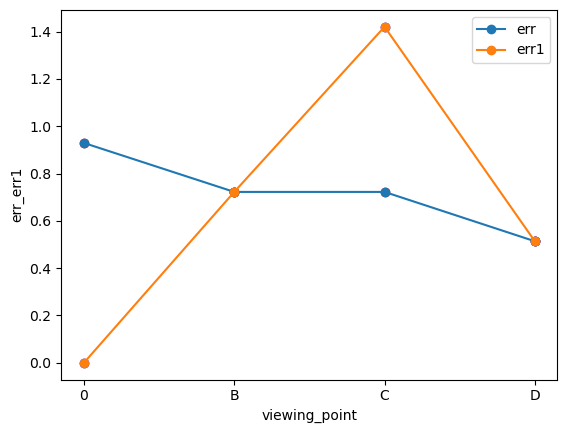

In [9]:
import matplotlib.pyplot as plt

# 时间
# 时间
x = [0, 1, 2, 3]

# err
y1 = [0.92908808204622595,0.72220011120,0.72220011120, 0.5136644963884866]

# err1
y2 = [0, 0.72220011120, 1.42021554865472, 0.5136644963884866]

# 绘制折线图和散点图
plt.plot(x, y1, '-o', label='err') # '-o'代表连线类型（实线）和标记类型（圆形）
plt.plot(x, y2, '-o', label='err1')
plt.scatter(x, y1, color='r') # 绘制err散点
plt.scatter(x, y2, color='b') # 绘制err1散点

# 添加图例
plt.legend()

# 添加x轴和y轴标签
plt.xlabel('viewing_point')
plt.ylabel('err_err1')

# 更改x轴标签
plt.xticks([0, 1, 2, 3], ['0', 'B', 'C', 'D', 'E'])
# 显示图表
plt.show()

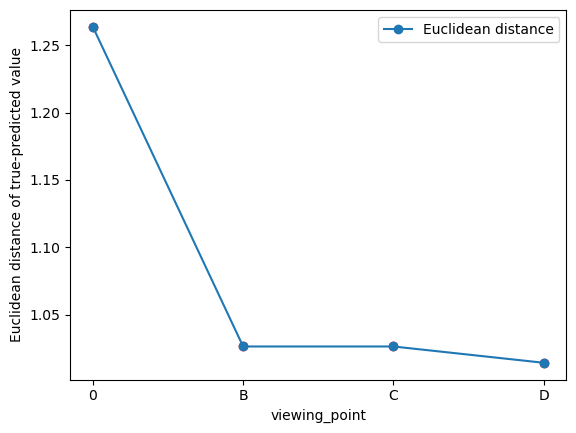

In [10]:
# 2.26372837819262     2.26372837819262         1.342452657451875      0.9754634796185507 0.9754634796185507
import matplotlib.pyplot as plt

# 时间
# 时间
x = [0, 1, 2, 3]

# err
y1 = [1.26372837819262,1.026372837819262,1.026372837819262,1.01427435856798452]


# 绘制折线图和散点图
plt.plot(x, y1, '-o', label='Euclidean distance') # '-o'代表连线类型（实线）和标记类型（圆形）
# plt.plot(x, y2, '-o', label='err1')
plt.scatter(x, y1, color='r') # 绘制err散点
# plt.scatter(x, y2, color='b') # 绘制err1散点

# 添加图例
plt.legend()

# 添加x轴和y轴标签
plt.xlabel('viewing_point')
plt.ylabel('Euclidean distance of true-predicted value')

# 更改x轴标签
plt.xticks([0, 1, 2, 3], ['0', 'B', 'C', 'D'])
# 显示图表
plt.show()

In [7]:
for K in car_positions:#通过car点预测K车
    if K != 'A':
        # 观察K点以外的点,遍历其他所有车辆作为基点
        for car in car_positions:
            if car not in ['K']:
                m1 = distance(car_positions[K], car_positionsreal[chr(ord(K)-1)])#car_positions[chr(ord(K)-1)]为已经处理过的点
                print('m1',m1)
                K = str(K)
                print('被观察车辆K',K)
                print('此时观察的出发点CAR',car)
                dK = length(K) #真是距离of 车K和车K-1
                # print(dK)
                err = abs(m1-dK)
                print('err',err)
                min_a_pos = car_positions[K]
                # # 计算基点与A车辆之间的距离和角度信息
                dist = distance(car_positionsreal[K], car_positionsreal[car])
                angle1 = angle(car_positionsreal[car], car_positionsreal[K])
                print('car_positions[car], car_positions[K]',car_positions[car], car_positions[K])
                print('dist',dist)
                print('angle',angle1)
                # # 计算预测的K点位置
                x1k, y1k = predict_position(car_positions[car], angle1, dist)
                PRE_K=[x1k, y1k]
                print('观察k点的位置：',PRE_K)
                print('k点真实位置',car_positionsreal[K])

                # # 计算预测位置与B车辆之间的欧氏距离
                m3 = distance(PRE_K, car_positionsreal[chr(ord(K)-1)])
                err1=abs(m3-dK)
                print('m3',m3)
                print('err1',err1)
                # # 如果比之前的最小距离小，则更新最小距离和对应的A点位置
                if err1 < err:
                    min_a_pos = [x1k, y1k]
                    car_positions[K] = min_a_pos # 最终确定K车辆的位置
                # print('****')
                # car_positions[K] = np.array(car_positions[K])
                # car_positionsreal[K] = np.array(car_positionsreal[K])
                # distance = np.linalg.norm(car_positions[K] - car_positionsreal[K])
                # print('迭代中的欧氏距离',distance)

    print("-----")
    print("哪辆车:",K)
    print('car_positions[K]改进',car_positions[K])
    print("-----")

# print('car_positions[A]',car_positions['A'])
for K in car_positions:
    # 将列表转换为NumPy数组
    print(K)
    car_positions[K] = np.array(car_positions[K])
    car_positionsreal[K] = np.array(car_positionsreal[K])
    distance = np.linalg.norm(car_positions[K] - car_positionsreal[K])
    print('此时的欧氏距离',distance)  # 输出欧几里得距离

    



-----
哪辆车: A
car_positions[K]改进 [679858.19, 419315.5]
-----
m1 15.771217454613428
被观察车辆K B
此时观察的出发点CAR A
err 1.8302966848168758
car_positions[car], car_positions[K] [679858.19, 419315.5] [679859.07, 419333.08]
dist 17.601514139430304
angle 2.8331453191067197
观察k点的位置： [679859.0599999999, 419333.08]
k点真实位置 [679858.67, 419334.94]
m3 15.770415340145032
err1 1.8310987992852716
m1 15.771217454613428
被观察车辆K B
此时观察的出发点CAR B
err 1.8302966848168758
car_positions[car], car_positions[K] [679859.07, 419333.08] [679859.07, 419333.08]
dist 0.0
angle 90.0
观察k点的位置： [679859.07, 419333.08]
k点真实位置 [679858.67, 419334.94]
m3 15.771217454613428
err1 1.8302966848168758
m1 15.771217454613428
被观察车辆K B
此时观察的出发点CAR C
err 1.8302966848168758
car_positions[car], car_positions[K] [679860.07, 419305.95] [679859.07, 419333.08]
dist 27.228369396663112
angle 357.8952589166885
观察k点的位置： [679859.07, 419333.16000000003]
k点真实位置 [679858.67, 419334.94]
m3 15.850958961565167
err1 1.7505551778651363
m1 15.850958961565167
被观察车辆K B

                print('****')
                car_positions[K] = np.array(car_positions[K])
                car_positionsreal[K] = np.array(car_positionsreal[K])
                distance = np.linalg.norm(car_positions[K] - car_positionsreal[K])
                print('迭代中的欧氏距离',distance)

In [ ]:
# 打印车辆位置信息
for car, pos in car_positions.items():
    print(f'{car}: {pos}')

In [4]:
# 优化后：

A = 0.9754634796185507
B = 0.9754634796185507
C = 0.8752594358227216
D =  0.8752594358227216
E = 0.8752594358227216

# 优化前：
A1 = 2.26372837819262
B1 = 1.2907009917280918
C1 = 1.886405356752844
D1= 0.9754634796185507
E1= 0.8752594358227216
m=(A+B+C+D+E)/5
n=(A1+B1+C1+D1+E1)/5
print("优化后的平均欧氏距离",m)

print("优化前平均欧氏距离",n)

print("优化程度",(n-m)/n)


优化后的平均欧氏距离 0.9153410533410533
优化前平均欧氏距离 1.4583115284229655
优化程度 0.3723281785127809
